       Lassi  Coffee Powder         Butter        Yougurt    Ghee Cheese  \
0       Ghee  Coffee Powder            NaN            NaN     NaN    NaN   
1      Lassi     Tea Powder         Butter         Cheese     NaN    NaN   
2     Cheese     Tea Powder         Panner  Coffee Powder  Butter  Bread   
3     Cheese        Yougurt  Coffee Powder          Sugar  Butter  Sweet   
4      Sugar     Tea Powder           Ghee          Sweet  Panner   Milk   
...      ...            ...            ...            ...     ...    ...   
8726  Panner          Sugar          Bread           Milk  Cheese    NaN   
8727   Sugar          Bread  Coffee Powder         Cheese     NaN    NaN   
8728   Bread         Cheese        Yougurt           Milk     NaN    NaN   
8729    Ghee          Bread        Yougurt          Sugar  Cheese    NaN   
8730  Panner        Yougurt          Bread            NaN     NaN    NaN   

      Unnamed: 6  
0            NaN  
1            NaN  
2            NaN  
3          

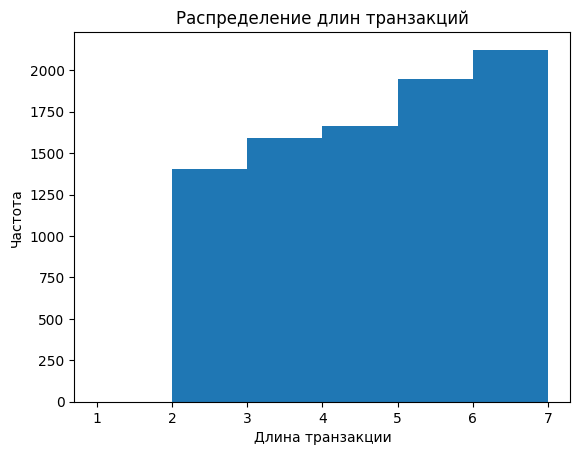

{'Coffee Powder', 'Tea Powder', 'Sugar', 'Panner', 'Sweet', 'Milk', 'Bread', 'Lassi', 'Cheese', 'Ghee', 'Butter', 'Yougurt'}
     support                  itemsets
0   0.269729           (Coffee Powder)
1   0.271561                  (Cheese)
2   0.264002                  (Butter)
3   0.259993              (Tea Powder)
4   0.268583                   (Bread)
5   0.263429                  (Panner)
6   0.270988                 (Yougurt)
7   0.267209                   (Sweet)
8   0.262856                   (Sugar)
9   0.274654                    (Ghee)
10  0.271332                    (Milk)
11  0.261711                   (Lassi)
12  0.074218  (Yougurt, Coffee Powder)
13  0.075707     (Coffee Powder, Ghee)
14  0.070210   (Coffee Powder, Cheese)
15  0.070439     (Milk, Coffee Powder)
16  0.071469            (Cheese, Ghee)
17  0.070324         (Butter, Yougurt)
18  0.072386            (Butter, Ghee)
19  0.071355    (Bread, Coffee Powder)
20  0.070782           (Bread, Cheese)
21  0.070553     

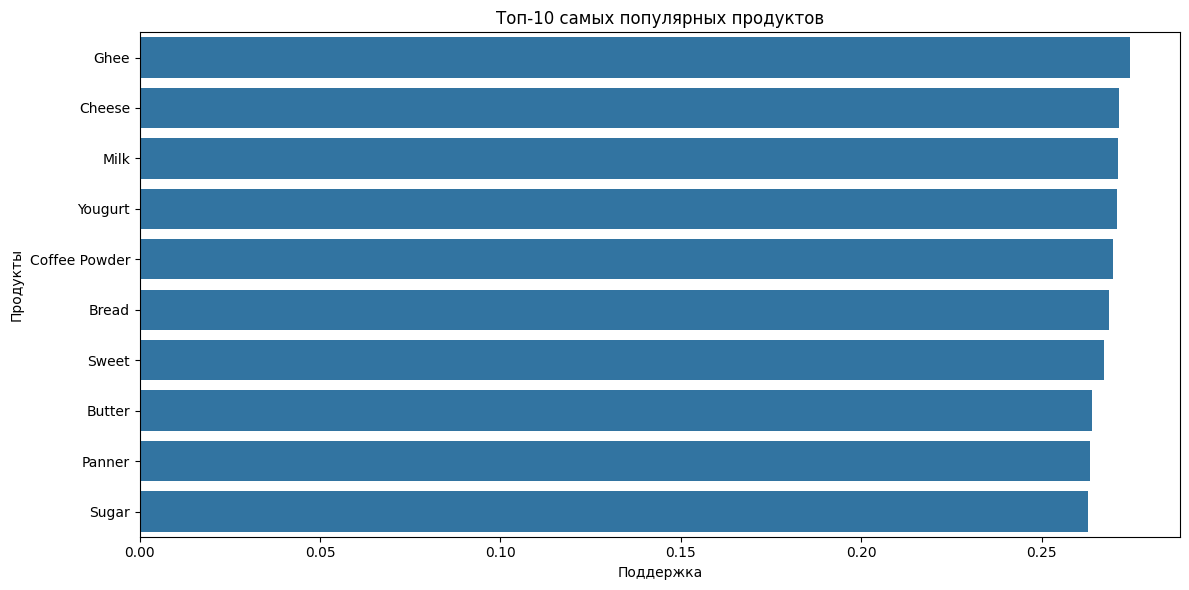

     antecedents    consequents  antecedent support  consequent support  \
0        Yougurt  Coffee Powder            0.270988            0.269729   
1  Coffee Powder        Yougurt            0.269729            0.270988   
2  Coffee Powder           Ghee            0.269729            0.274654   
3           Ghee  Coffee Powder            0.274654            0.269729   
4         Butter           Ghee            0.264002            0.274654   
5         Panner          Bread            0.263429            0.268583   
6         Panner          Sweet            0.263429            0.267209   
7          Sweet           Ghee            0.267209            0.274654   
8          Lassi          Sweet            0.261711            0.267209   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.074218    0.273880  1.015391               1.0  0.001125    1.005717   
1  0.074218    0.275159  1.015391               1.0  0.001125    1.005754   
2  0.075707    0.2

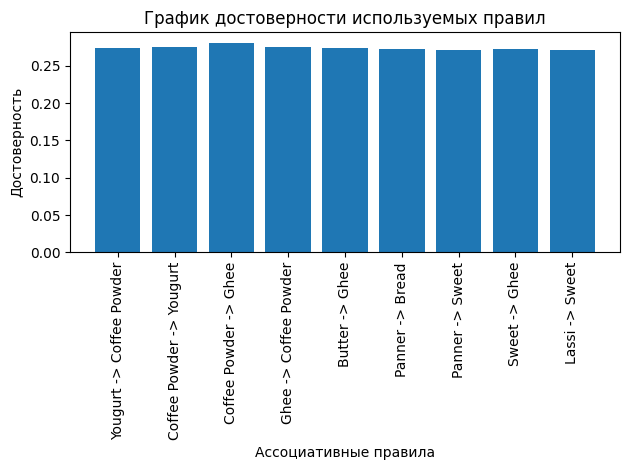

C:\Users\super\AppData\Local\Temp\ipykernel_28784\531632598.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


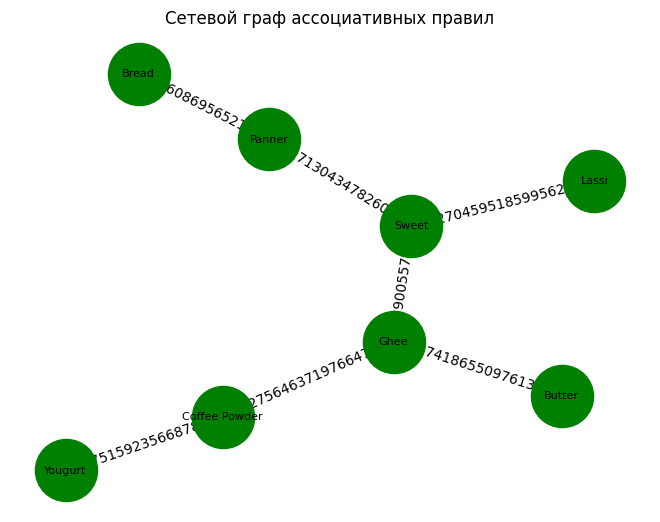

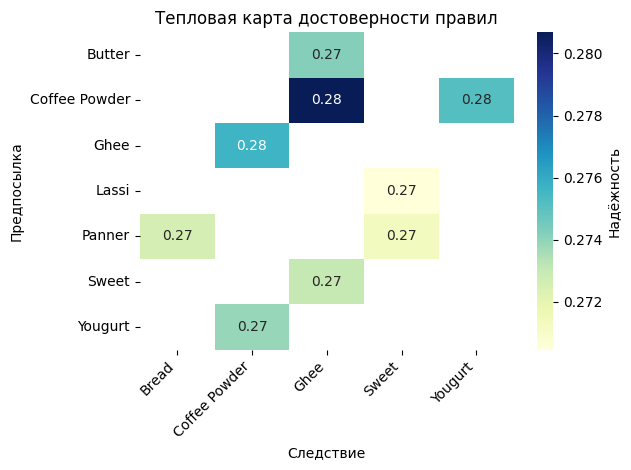

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import networkx as nx

#Загрузка данных
all_data = pd.read_csv('DataSetA.csv', on_bad_lines='skip')
print(all_data)


# Анализ транзакций
transaction_lengths = all_data.notnull().sum(axis=1)
plt.hist(transaction_lengths, bins=range(1, max(transaction_lengths) + 2))
plt.xlabel('Длина транзакции')
plt.ylabel('Частота')
plt.title('Распределение длин транзакций')
plt.show()

#Очистка данных
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str)] for row in np_data]

#Список уникальных товаров
unique_items = set()
for row in np_data:
    for elem in row:
        unique_items.add(elem)
print(unique_items)
te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)

#Алгоритм FPG
df1 = fpgrowth(data, min_support=0.07, use_colnames = True)
print(df1)
rules = association_rules(df1, metric = "confidence", min_threshold = 0.27)
print(rules)

#Алгоритм Apriori
# df1 = apriori(data, min_support=0.07, use_colnames = True)
# print(df1)
# rules = association_rules(df1, metric = "confidence", min_threshold = 0.275)
# print(rules)

#Поддержка
df1['itemsets'] = df1['itemsets'].apply(lambda x: ', '.join(list(x)))
top_products = df1.sort_values(by='support', ascending=False).head(10)
print(top_products)
plt.figure(figsize=(12, 6))
sns.barplot(x='support', y='itemsets', data=top_products)
plt.title('Топ-10 самых популярных продуктов')
plt.xlabel('Поддержка')
plt.ylabel('Продукты')
plt.tight_layout()
plt.show()

rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

#График достоверности используемых правил
products_1 = rules["antecedents"].tolist()
products_2 = rules["consequents"].tolist()
confidence = rules["confidence"].tolist()
print(rules)
rules_labels = [f"{product1} -> {product2}" for product1, product2 in zip(products_1, products_2)]
plt.bar(rules_labels, confidence)
plt.xlabel("Ассоциативные правила")
plt.ylabel("Достоверность")
plt.title("График достоверности используемых правил")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Визуализация ассоциативных правил в виде графа
G = nx.Graph()
for product in rules["antecedents"]:
    G.add_node(product)
for product in rules["consequents"]:
    G.add_node(product)
for index, row in rules.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], weight=row['confidence'])
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='green', font_size=8)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Сетевой граф ассоциативных правил')
plt.tight_layout()
plt.show()

#Дополнительная визуализация ассоциативных правил

heatmap_data = rules.copy()
heatmap_data['support'] = rules.apply(
    lambda row: df1[df1['itemsets'] == row['antecedents']]['support'].values[0], axis=1
)
heatmap_data['confidence'] = rules['confidence']

heatmap_matrix = heatmap_data.pivot(index='antecedents', columns='consequents', values='confidence')

sns.heatmap(heatmap_matrix, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Надёжность'})
plt.title('Тепловая карта достоверности правил')
plt.xlabel('Следствие')
plt.ylabel('Предпосылка')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Описание данных из датасета

Был загружен датасет "DataSetA.csv", содержащий информацию о транзакциях. Датасет состоит из 8731 строк и 7 столбцов. Каждая строка представляет собой одну транзакцию (покупку). Товары в транзакции записаны в разные колонки. Пропуски (NaN) означают отсутствие товара в данной позиции транзакции.  

На гистограмме по горизонтальной оси отложена длина транзакции (количество товаров в одной покупке), а по вертикальной — частота (сколько раз такая длина встретилась в датасете). Распределение является правосторонним (Левосторонняя ассиметрия). Гистограмма показывает, что большинство транзакций имеют большую длину (6-7 элементов).  

На основе этого, был выявлен список уникальных товаров в датасете, включающий молочные продукты (Lassi, Yogurt, Cheese, Ghee), бакалею (Coffee Powder, Tea Powder, Bread, Sugar) и другие товары.  
Общий список:  
Coffee Powder, Tea Powder, Sugar, Panner, Sweet, Milk, Bread, Lassi, Cheese, Ghee, Butter, Yougurt  

На основе проведённого первичного анализа можно сделать следующие выводы:  

1. Датасет содержит разреженные данные с преобладанием коротких транзакций, что типично для потребительского поведения в розничной торговле.

2. Наличие разнообразных товаров и транзакций создает хорошую основу для выявления значимых ассоциативных правил между продуктами.

3. Данные успешно преобразованы в формат, пригодный для применения алгоритмов Apriori и FPGrowth в следующих этапах работы.

4. Распределение демонстрирует резкий спад частоты с увеличением длины транзакции. Большинство покупателей приобретают большее количество товаров совместно (6-7 товаров), что отражает реальные паттерны покупок. Это важно учитывать при выборе параметров поддержки для алгоритмов ассоциативных правил.

# Алгоритм Apriori

Был проведен анализ ассоциативных правил для транзакционных данных с использованием алгоритма Apriori. Исходные параметры (по варианту) - min_support (0.07) и min_confidence (0.27). Вывод следующий:  
```
     antecedents    consequents  antecedent support  consequent support  \
0         Panner          Bread            0.263429            0.268583   
1         Butter           Ghee            0.264002            0.274654   
2  Coffee Powder           Ghee            0.269729            0.274654   
3           Ghee  Coffee Powder            0.274654            0.269729   
4        Yougurt  Coffee Powder            0.270988            0.269729   
5  Coffee Powder        Yougurt            0.269729            0.270988   
6          Sweet           Ghee            0.267209            0.274654   
7          Lassi          Sweet            0.261711            0.267209   
8         Panner          Sweet            0.263429            0.267209   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.071813    0.272609  1.014988               1.0  0.001060    1.005534   
1  0.072386    0.274187  0.998300               1.0 -0.000123    0.999357   
2  0.075707    0.280679  1.021940               1.0  0.001625    1.008377   
3  0.075707    0.275646  1.021940               1.0  0.001625    1.008170   
4  0.074218    0.273880  1.015391               1.0  0.001125    1.005717   
5  0.074218    0.275159  1.015391               1.0  0.001125    1.005754   
6  0.072958    0.273039  0.994122               1.0 -0.000431    0.997779   
7  0.070782    0.270460  1.012165               1.0  0.000851    1.004456   
8  0.071469    0.271304  1.015327               1.0  0.001079    1.005620   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.020048  0.156048   0.005504    0.269993  
1      -0.002309  0.155244  -0.000644    0.268870  
2       0.029398  0.161535   0.008308    0.278163  
3       0.029598  0.161535   0.008104    0.278163  
4       0.020792  0.159096   0.005685    0.274520  
5       0.020756  0.159096   0.005721    0.274520  
6      -0.008005  0.155594  -0.002226    0.269339  
7       0.016280  0.154500   0.004436    0.267677  
8       0.020495  0.155650   0.005589    0.269386  
```

Сформировано 9 ассоциативных правил, что свидетельствует об относительно консервативном подходе к фильтрации.  

Статистический профиль полученных правил:

* Диапазон поддержки (support): 0.071-0.076 (7.1%-7.6%)
* Диапазон достоверности (confidence): 0.270-0.281 (27.0%-28.1%)
* Диапазон лифта (lift): 0.994-1.022  

1. (Coffee Powder) → (Ghee): lift = 1.022, support = 0.0757, confidence = 0.281. Показатели говорят о том, что покупатели кофейного порошка в 1.022 раза чаще среднего приобретают ги (топленое масло). Это самая сильная ассоциация в данных, хотя ее практическая значимость невысока.

2. (Ghee) → (Coffee Powder): lift = 1.022, support = 0.0757, confidence = 0.276. Наблюдается взаимная связь - покупатели ги также чаще приобретают кофейный порошек. Симметричность значений лифта указывает на двустороннюю ассоциацию между товарами.

3. (Coffee Powder) → (Yougurt): lift = 1.015, support = 0.0742, confidence = 0.275. Покупатели кофейного порошка в 1.015 раза чаще среднего приобретают йогурт. Умеренная, но статистически значимая связь.

4. (Yougurt) → (Coffee Powder): lift = 1.015, support = 0.0742, confidence = 0.274. Обратная ассоциация также присутствует - покупатели йогурта чаще приобретают кофейный порошек, что формирует устойчивую товарную пару.

5. (Panner) → (Bread): lift = 1.015, support = 0.0718, confidence = 0.273.
Покупатели панира (творожного сыра) в 1.015 раза чаще среднего приобретают хлеб. Слабая, но статистически подтвержденная ассоциация.

6. (Panner) → (Sweet): lift = 1.015, support = 0.0715, confidence = 0.271.
Наблюдается связь между покупкой панира и сладостей - покупатели панира немного чаще приобретают сладкие продукты.

7. (Lassi) → (Sweet): lift = 1.012, support = 0.0708, confidence = 0.270.
Покупатели ласси (йогуртового напитка) в 1.012 раза чаще среднего приобретают сладости, что отражает естественное сочетание продуктов.

Слабые/тривиальные ассоциации:
1. (Butter) → (Ghee): lift = 0.998 - практически случайная ассоциация
2. (Sweet) → (Ghee): lift = 0.994 - минимальная корреляция

Все выявленные правила демонстрируют статистически значимые, но коммерчески слабые связи между товарами. Наиболее перспективными для бизнес-решений являются взаимные ассоциации Coffee Powder ↔ Ghee и Coffee Powder ↔ Yougurt, которые могут быть использованы для совместного размещения и кросс-промоушена.  

После увеличения порога минимальной поддержки min_support с 0.07 до 0.072 наблюдается заметное изменение в структуре и объёме получаемых ассоциативных правил.
Осталось всего 6 правил из 9, и все из них имеют support в пределах от 0.072 до 0.076, т.е. встречаются минимум у 7% пользователей:

```
     antecedents    consequents  antecedent support  consequent support  \
0         Butter           Ghee            0.264002            0.274654   
1  Coffee Powder           Ghee            0.269729            0.274654   
2           Ghee  Coffee Powder            0.274654            0.269729   
3        Yougurt  Coffee Powder            0.270988            0.269729   
4  Coffee Powder        Yougurt            0.269729            0.270988   
5          Sweet           Ghee            0.267209            0.274654   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.072386    0.274187  0.998300               1.0 -0.000123    0.999357   
1  0.075707    0.280679  1.021940               1.0  0.001625    1.008377   
2  0.075707    0.275646  1.021940               1.0  0.001625    1.008170   
3  0.074218    0.273880  1.015391               1.0  0.001125    1.005717   
4  0.074218    0.275159  1.015391               1.0  0.001125    1.005754   
5  0.072958    0.273039  0.994122               1.0 -0.000431    0.997779   

   zhangs_metric   jaccard  certainty  kulczynski  
0      -0.002309  0.155244  -0.000644    0.268870  
1       0.029398  0.161535   0.008308    0.278163  
2       0.029598  0.161535   0.008104    0.278163  
3       0.020792  0.159096   0.005685    0.274520  
4       0.020756  0.159096   0.005721    0.274520  
5      -0.008005  0.155594  -0.002226    0.269339  
```

Это логично — более редкие сочетания отсеклись из-за повышения min_support.  

После увеличения минимального порога метрики min_threshold (confidence) с 0.27 до 0.275 также наблюдается заметное изменение в структуре и объёме получаемых ассоциативных правил.
Осталось всего 3 правила и все из них имеют support в пределах от 0.074 до 0.076, т.е. встречаются минимум у 7-8% пользователей:

```
antecedents    consequents  antecedent support  consequent support  \
0  Coffee Powder           Ghee            0.269729            0.274654   
1           Ghee  Coffee Powder            0.274654            0.269729   
2  Coffee Powder        Yougurt            0.269729            0.270988   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.075707    0.280679  1.021940               1.0  0.001625    1.008377   
1  0.075707    0.275646  1.021940               1.0  0.001625    1.008170   
2  0.074218    0.275159  1.015391               1.0  0.001125    1.005754   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.029398  0.161535   0.008308    0.278163  
1       0.029598  0.161535   0.008104    0.278163  
2       0.020756  0.159096   0.005721    0.274520
```

Lift стал довольно высоким (Минимальное значение - 1.015), что позволяет назвать оставшиеся правила довольно сильными.  

Таким образом, повышение параметров приводит к уменьшению числа правил, но увеличивает их «качество»: сильные связи остаются, а слабые и нерелевантные — отсеиваются.  

# Алгоритм FPG

Был проведен анализ ассоциативных правил для транзакционных данных с использованием алгоритма Apriori. Исходные параметры (по варианту) - min_support (0.07) и min_confidence (0.27). Вывод следующий:  

```
antecedents    consequents  antecedent support  consequent support  \
0        Yougurt  Coffee Powder            0.270988            0.269729   
1  Coffee Powder        Yougurt            0.269729            0.270988   
2  Coffee Powder           Ghee            0.269729            0.274654   
3           Ghee  Coffee Powder            0.274654            0.269729   
4         Butter           Ghee            0.264002            0.274654   
5         Panner          Bread            0.263429            0.268583   
6         Panner          Sweet            0.263429            0.267209   
7          Sweet           Ghee            0.267209            0.274654   
8          Lassi          Sweet            0.261711            0.267209   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.074218    0.273880  1.015391               1.0  0.001125    1.005717   
1  0.074218    0.275159  1.015391               1.0  0.001125    1.005754   
2  0.075707    0.280679  1.021940               1.0  0.001625    1.008377   
3  0.075707    0.275646  1.021940               1.0  0.001625    1.008170   
4  0.072386    0.274187  0.998300               1.0 -0.000123    0.999357   
5  0.071813    0.272609  1.014988               1.0  0.001060    1.005534   
6  0.071469    0.271304  1.015327               1.0  0.001079    1.005620   
7  0.072958    0.273039  0.994122               1.0 -0.000431    0.997779   
8  0.070782    0.270460  1.012165               1.0  0.000851    1.004456   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.020792  0.159096   0.005685    0.274520  
1       0.020756  0.159096   0.005721    0.274520  
2       0.029398  0.161535   0.008308    0.278163  
3       0.029598  0.161535   0.008104    0.278163  
4      -0.002309  0.155244  -0.000644    0.268870  
5       0.020048  0.156048   0.005504    0.269993  
6       0.020495  0.155650   0.005589    0.269386  
7      -0.008005  0.155594  -0.002226    0.269339  
8       0.016280  0.154500   0.004436    0.267677
```

Также как и в Apriori, было сформировано 9 ассоциативных правил.

Статистический профиль полученных данных:

* Диапазон поддержки (support): 0.0708-0.0757 (7.1%-7.6%)
* Диапазон достоверности (confidence): 0.2704-0.2807 (27.0%-28.1%)
* Диапазон лифта (lift): 0.9941-1.0219  

Сильные связи (относительно других правил в наборе):

1) Coffee Powder ↔ Ghee (взаимная ассоциация):  
    Coffee Powder → Ghee: lift = 1.022, confidence = 0.281  
    Ghee → Coffee Powder: lift = 1.022, confidence = 0.276.  
    *Покупатели кофейного порошка и ги демонстрируют взаимный интерес - эти товары приобретаются вместе на 2.2% чаще случайного уровня.*

2) Coffee Powder ↔ Yougurt (взаимная ассоциация):  
    Yougurt → Coffee Powder: lift = 1.015, confidence = 0.274  
    Coffee Powder → Yougurt: lift = 1.015, confidence = 0.275  
    *Наблюдается стабильная двусторонняя связь между кофейным порошком и йогуртом с увеличением совместных покупок на 1.5%.*

Умеренные связи:

3) Panner → Bread: lift = 1.015, confidence = 0.273.  
    Покупатели панира на 1.5% чаще приобретают хлеб, что может отражать кулинарные предпочтения.

4) Panner → Sweet: lift = 1.015, confidence = 0.271.  
    Аналогичная связь наблюдается между паниром и сладостями.

Слабые/тривиальные связи:

5) Lassi → Sweet: lift = 1.012, confidence = 0.270.  
    Минимальная ассоциация между напитком ласси и сладостями.

6) Butter → Ghee: lift = 0.998, confidence = 0.274.  
    Практически случайная связь между маслом и ги.

7) Sweet → Ghee: lift = 0.994, confidence = 0.273.  
    Наименьшая корреляция в наборе - практически отсутствующая связь.

Итог схож с методом Apriori. Все выявленные правила демонстрируют статистически значимые, но коммерчески слабые связи между товарами.

# Анализ сетевого графа ассоциативных правил

Анализируя сетевой граф ассоциативных правил можно сделать следующие выводы:

1. Товары *Ghee* и *Sweet* имеют наибольшее количество связей (3), следовательно имеют высокую степень центральности и собой соединяют два кластера товаров (*Ghee, Coffee Powder, Yougurt, Butter*) и (*Sweet, Panner, Bread, Lassi*).
2. Товары *Coffee Powder* и *Panner* имеют 2 связи, но являются мостами между разными товарами, что говорит об их посреднической центральности.
3. Самая высокая достоверность у *Coffee Powder* и *Ghee*, самая низкая у *Lassi* и *Sweet*.

Связи слабые, но логичные; граф состоит из нескольких локальных цепочек, связанных через пару центральных товаров (Ghee и Sweet).

# Свой способ визуализации ассоциативных правил

В качестве альтернативы была сформирована тепловая карта по ассоциативным правилам:  
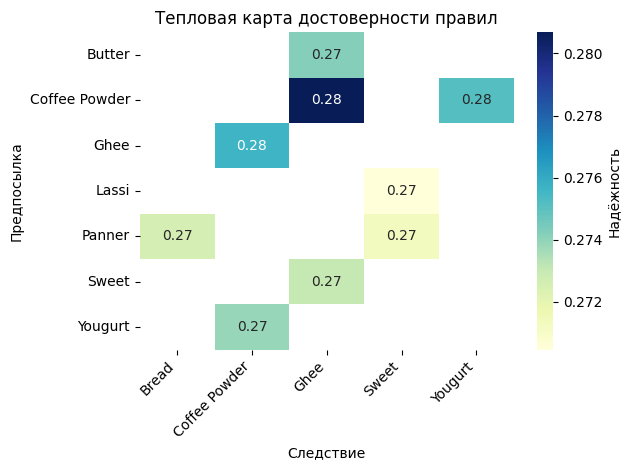  
Где каждая клетка - это правило типа "А -> B", в котором A - это предпосылка, а B - это последствие. Цвет показывает достоверность правила (есть шкала измерений для удобства) и сразу видно, какие пары кинокартин связаны сильной ассоциацией (по метрике достоверности).